# The HFM library - A fast marching solver with adaptive stencils

## Part : Seismology
## Chapter : Tomographic inversion

In this notebook, we illustrate tomographic inversion based on traveltimes, in an isotropic medium. 

In [2]:
import sys; sys.path.append("../..") # Allow imports from parent directory
from Miscellaneous import TocTools; TocTools.displayTOC('Tomography','FMM')

[**Summary**](Summary.ipynb) of this series of notebooks. [(view online)](http://nbviewer.jupyter.org/urls/rawgithub.com/Mirebeau/AdaptiveGridDiscretizations/master/Notebooks_FMM/Tomography.ipynb)

[**Main summary**](../Summary.ipynb), including the other volumes of this work. [(view online)](http://nbviewer.jupyter.org/urls/rawgithub.com/Mirebeau/AdaptiveGridDiscretizations/master/Summary.ipynb)


# Table of contents




This Python&reg; notebook is intended as documentation and testing for the [HamiltonFastMarching (HFM) library](https://github.com/mirebeau/HamiltonFastMarching), which also has interfaces to the Matlab&reg; and Mathematica&reg; languages. 
More information on the HFM library in the manuscript:
* Jean-Marie Mirebeau, Jorg Portegies, "Hamiltonian Fast Marching: A numerical solver for anisotropic and non-holonomic eikonal PDEs", 2019 [(link)](https://hal.archives-ouvertes.fr/hal-01778322)

Copyright Jean-Marie Mirebeau, University Paris-Sud, CNRS, University Paris-Saclay


## 0. Importing the required libraries

In [96]:
import HFMUtils
from NumericalSchemes import FiniteDifferences as fd

In [4]:
import numpy as np
import scipy.linalg
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Statement of the problem

In [56]:
r_equipment=0.9
n_sources=10
sources = r_equipment*np.array([(np.cos(t),np.sin(t)) for t in np.linspace(0,2.*np.pi,n_sources,endpoint=False)])
n_receivers=80
receivers = r_equipment*np.array([(np.cos(t),np.sin(t)) for t in np.linspace(0,2.*np.pi,n_receivers,endpoint=False)])

In [57]:
hfmIn = HFMUtils.Rect([-1,-1],[1,1],dimx=100)
hfmIn.update({
    'model':'Isotropic2',
    'arrayOrdering':'RowMajor',
    'exportValues':True
})

In [58]:
X,Y = HFMUtils.GetGrid(hfmIn)

In [71]:
def Gaussian(x,y,sigma): return np.exp(-(x**2+y**2)/(2*sigma))/(2*np.pi*sigma)
cost_perturbation = 0.5*Gaussian(X-0.6,Y-0.3,0.4)-0.3*Gaussian(X+0.4,Y,0.3)+0.1*Gaussian(X-0.1,Y+0.5,0.1)
cost = 1.+3.*cost_perturbation

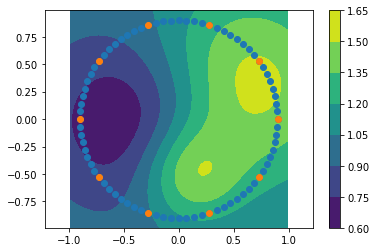

In [72]:
plt.axis('equal')
plt.contourf(X,Y,cost); plt.colorbar();
plt.scatter(receivers[:,0],receivers[:,1]);
plt.scatter(sources[:,0],sources[:,1]);

In [99]:
hfmIn.update({
    'cost':cost,
    'seeds':[sources[0]],
    'tips':receivers
})

In [81]:
hfmOut = HFMUtils.Run(hfmIn)

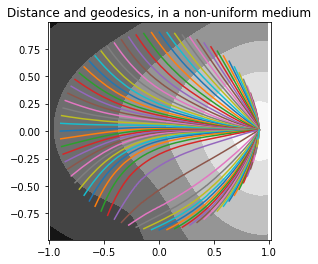

In [84]:
plt.figure(figsize=[4,4]); plt.title('Distance and geodesics, in a non-uniform medium');  plt.axis('equal'); 
plt.contourf(X,Y,hfmOut['values'],cmap='Greys') # Display the value function. 
for geo in HFMUtils.GetGeodesics(hfmOut):  plt.plot(geo[:,0],geo[:,1]) 

The traveltimes obtained with various sources gather information over all the domain data.
The purpose of seismic tomography is compute the medium properties from the traveltimes, instead of the converse done here.

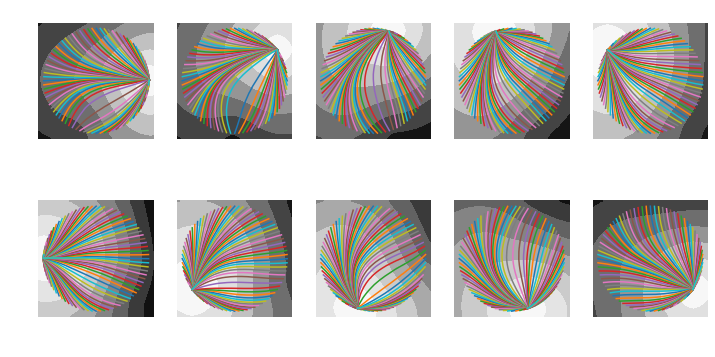

In [95]:
plt.figure(figsize=[12,6]); 
for i,source in enumerate(sources):
    hfmIn['seeds']=[source]
    hfmOut = HFMUtils.Run(hfmIn)
    plt.subplot(2,5,1+i)
    plt.axis('equal'); plt.axis('off')
    plt.contourf(X,Y,hfmOut['values'],cmap='Greys') 
    for geo in HFMUtils.GetGeodesics(hfmOut):  plt.plot(geo[:,0],geo[:,1]) 

In [98]:
#hfmIn.pop('tips',None);

In [ ]:
for source in sources:
    hfmIn['seeds']=[source]
    hfmOut = HFMUtils.Run(hfmIn)
    
    interp = fd.UniformGridInterpolator(

## 2. Optimized functional


In [ ]:
def regularizer(cost):
    

## 3. Path based tomography

## 4. Adjoint based tomography